In [26]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import math


flagEditable=True #To initialize variables to communicate between each other.
index=0
point=0
pointNumber=1
pointList=[[0,0],[0,0]] # [x point,y point]
    
def check_coordinates(x,y):   #Check func. which is returns boolean two points distance situation
    if point==1:  #Meaning first point is selected and must be distance greater than 10
        if math.sqrt(((pointList[1][0]-x)**2) + ((pointList[1][1]-y)**2))>10:
            return True
        else:
            print("Between two points, distance must be at least 10 pixel")
    elif point==2:    #Meaning second point is selected and must be distance greater than 10
        if math.sqrt( ((pointList[0][0]-x)**2) + ((pointList[0][1]-y)**2) )>10:
            return True
        else:    
            print("Between two points, distance must be at least 10 pixel")
    else:
        print("Between two points, distance must be at least 10 pixel")
        return False

    
def selectedPoints(x,y): #If user clicks the area within circle, this func. checks whether in it or not
    global point
    if ((x-pointList[0][0])**2 + (y - pointList[0][1])**2 <= 100):
        # Circle eq. must satisfy (x - center_x)^2 + (y - center_y)^2 < radius^2. 
        point=1
        return True
        #Return True when first point selected and checks if it is in the circle (edited area)
    elif ((x-pointList[1][0])**2 + (y - pointList[1][1])**2 <= 100):
        point = 2
        return True
        #Return False when the second point selected and checks if it is in the circle (edited area)
    else:
        point=0
        return False

def re_draw():  #To avoid those printing codes everywhere, I wrote a function
    global img,flagforPointone,flagforPointtwo
    img = cv2.imread("img2.jpg")  #Read the image again for cleaning the drawed shapes.
    cv2.circle(img,(pointList[0][0],pointList[0][1]),3,(0,255,0),-3)
    cv2.circle(img,(pointList[0][0],pointList[0][1]),10,(0,255,255),1)    
    cv2.circle(img,(pointList[1][0],pointList[1][1]),3,(0,255,0),-3)
    cv2.circle(img,(pointList[1][0],pointList[1][1]),10,(0,255,255),1)
    cv2.rectangle(img,(pointList[0][0],pointList[0][1]),(pointList[1][0],pointList[1][1]),(0,0,255),1)


def editable(event,x,y,flags,param): #This is the main function which will be in loop
    global index,pointNumber,flagEditable #These variables for communicating
    if event == cv2.EVENT_LBUTTONDBLCLK:
        
        if (pointNumber)>=3:  #This if, checks first two points is drawed or not.
            
            if flagEditable:  #If two points are drawed, editable condition is enabled.
                if selectedPoints(x,y) and point==1 :  #Checks and knows which point is which
                    cv2.circle(img,(pointList[0][0],pointList[0][1]),3,(255,0,255),-3)
                    flagEditable=False  #Then, editable is false because one edit at a time.
                elif selectedPoints(x,y) and point==2 : #Checks and know which point is which.
                    cv2.circle(img,(pointList[1][0],pointList[1][1]),3,(255,0,255),-3)
                    flagEditable=False # Then, editable is false because one edit at a time.
            elif flagEditable==False:  # If not editable
                #This checks new click points, if it satisfies conditions then assigned the values and redraw
                if point==1 and check_coordinates(x,y) and (x<pointList[1][0] and y<pointList[1][1]):
                    pointList[0][0]=x
                    pointList[0][1]=y
                    re_draw()                   
                    flagEditable=True # And after do editable
                #This checks new click points, if it satisfies conditions then assigned the values and redraw    
                elif point==2 and check_coordinates(x,y) and (x>pointList[0][0] and y>pointList[0][1]):
                    pointList[1][0]=x
                    pointList[1][1]=y
                    re_draw()
                    flagEditable=True
        else: #This else checks if first two point selected or not.IF NOT selected below codes will work
            if index==1 and (x>pointList[0][0] and y>pointList[0][1]) and math.sqrt(((pointList[0][0]-x)**2) + ((pointList[0][1]-y)**2))>10: #This is for first two points selected and the distance between must greater than 10
                #And also above if statement checks while picking 2. point after 1. is selected, it will not allowe to choose 1,2,3 area in the homework description.
                pointList[index][0]=x # If the distance situation satisfies, assign the value to our list[1].
                pointList[index][1]=y
                cv2.circle(img,(pointList[index][0],pointList[index][1]),3,(0,255,0),-3) 
                cv2.circle(img,(pointList[index][0],pointList[index][1]),10,(0,255,255),1) 
                index+=1 #This is just for incrementing
                pointNumber+=1 #This is just for how many point is selected
            elif index==0: #This doesnt have check condition because we dont need for first time.
                pointList[index][0]=x #Assign the new values to our list[0]
                pointList[index][1]=y
                cv2.circle(img,(pointList[index][0],pointList[index][1]),3,(0,255,0),-3)
                cv2.circle(img,(pointList[index][0],pointList[index][1]),10,(0,255,255),1)
                index+=1 #This is just for incrementing
                pointNumber+=1 #This is just for how many point is selected
                
            if pointNumber==3:  #IF first two point is selected, draw the rectangle.
                cv2.rectangle(img,(pointList[0][0],pointList[0][1]),(pointList[1][0],pointList[1][1]),(0,0,255),1)

 

#### Read the image and shows.

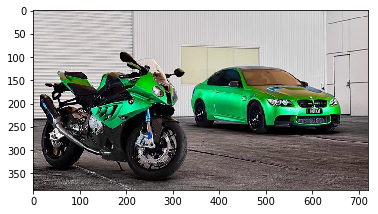

In [27]:
img = cv2.imread("img2.jpg")
%matplotlib inline
plt.imshow(img)

#### Create a namedWindow and initialize the setmousecallback function.

In [28]:
cv2.namedWindow('Editor')
cv2.setMouseCallback('Editor',editable,img)

#### Main loop, If pressed "ESC" it exits. It shows the ROI editor.

In [29]:
while(1):
    cv2.imshow('Editor',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyWindow('Editor')

Between two points, distance must be at least 10 pixel
Between two points, distance must be at least 10 pixel
Between two points, distance must be at least 10 pixel


#### This for writing coordinates to a file and gets input from the user

In [ ]:
object = input("What is the object's name? ")
f = open('roi_file.txt','w')
f.write('"' + object + ', ('+  str(pointList[0][0])+ ','+ str(pointList[0][1])+ '), '+ '('+ str(pointList[1][0])+ ',' +   str(pointList[1][1]) +')"')
f.close()